In [ ]:
Telecom Churn Case Study(Machine learning -II)
Problem Statement
Business problem overview
1.In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. 
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one,
customer retention has now become even more important than customer acquisition. 
2.For many incumbent operators, retaining high profitable customers is the number one business goal and 
they have a churn rate of around 15-25% annually.
3.So for telecom operators retaining existing customers has become more important than acquiring new customers
4.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
5.In this project, we will analyse customer-level data of a leading telecom firm, 
build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Definitions of churn
There are various ways to define churn, such as:

Revenue-based churn:
Customers who have not utilised any revenue-generating facilities such as mobile internet, 
outgoing calls, SMS etc. over a given period of time. 
One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month
in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes 
from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. 
For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn:
Customers who have not done any usage, either incoming or outgoing - in terms of calls,
internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services 
for a while, it may be too late to take any corrective actions to retain them. 
For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless
since by that time the customer would have already switched to another operator.



In this project, we will use the usage-based definition to define churn.


Objective
We are given with 4 month data in this module and we will be analyzing the churn data from the last month in dataset( which is the action period)
and we need to Predict the customers who are about to churn from a telecom operator
 

Data Preparation Steps:
1. Filter High Value Customers
2. Tag churners and remove attributes of the churn phase

Steps to Approach The Best Solution For This Case Study
There are mainly 6 steps

Step 1 :
. Data reading
. Data Understanding
. Data Cleaning
. Imputing missing values

Data Preparation
Step-2 :
Need to Filter high value customers

Step-3 :
Derive churn
need to Derive the Target Variable

Step-4 :

.Derived variable
.EDA
.Split data in to train and test sets
.Performing Scaling

Step-5 :
. Handling class imbalance
. Dimensionality Reduction using PCA
. Classification models to predict Churn (Use various Models )

Step-6 :
. Model Evaluation
. Prepare Model for Predictor variables selection (Prepare multiple models & choose the best one)

Summary of the churn prediction model to the business team

In [3]:
##Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing warnings to ingnore warnings
import warnings
warnings.filterwarnings("ignore")

In [1]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## STEP1

1. Data Reading / Understanding

In [5]:
churn = pd.read_csv("telecom_churn_data.csv")
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [6]:
churn.shape

(99999, 226)

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [10]:
churn.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [25]:
# check the missing value ratio
churn.isnull().sum()*100/churn.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print(churn.info())
def metadata_matrix(churn) : 
    return pd.DataFrame({
                'Datatype' : churn.dtypes.astype(str), 
                'Non_Null_Count': churn.count(axis = 0).astype(int), 
                'Null_Count': churn.isnull().sum().astype(int), 
                'Null_Percentage': round(churn.isnull().sum()/len(churn) * 100 , 2), 
                'Unique_Values_Count': churn.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(churn)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 173.2+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
fb_user_6,float64,25153,74846,74.85,2
av_rech_amt_data_6,float64,25153,74846,74.85,887
date_of_last_rech_data_6,object,25153,74846,74.85,30
count_rech_2g_6,float64,25153,74846,74.85,31
count_rech_3g_6,float64,25153,74846,74.85,25


In [11]:
churn.drop_duplicates(subset=None, inplace=True)
churn.shape

(99999, 226)

From the above observation, mobile number is the only column having all unique value and it can be considerded as the index column and there are few recharge columns (around 40 columns)  having more than 73% of null values

2. Data Cleansing and preparation

In [19]:
# grouping all recharge columns into a dataframe
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


We can notice that the minimum value present in these columns is 1 and more than 73% null values can be imputed with zero,
assuming no data recharge was done rather than having null values


In [20]:
churn

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [21]:
# If recharge date and the recharge value are missing together which means the customer didn't recharge
churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)


,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [23]:
null_col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

3. Missing Value Imputation

In [ ]:
we notice that in the absence of data recharge (date_of_last_rech_data_7) done for that particular month, user is not using corresponding internet related services, which is understandable. Hence we should impute these NAN values with 0.

In [24]:
# impute missing values with 0
churn[null_col] = churn[null_col].apply(lambda x: x.fillna(0))

In [26]:
churn[null_col].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,48.445409,51.393440,52.027022,49.961089,31.792048,32.406314,33.113011,32.387644
std,1.760541,1.924382,1.963417,1.669040,127.743863,132.629365,131.182609,127.804280,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,8.250000,17.000000,23.000000,17.000000,8.000000,14.000000,17.000000,17.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.000000


In [35]:
churn

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [30]:
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

In [31]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]


In [33]:
num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

In [34]:
id_cols = ['mobile_number', 'circle_id']
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


We need to now verify the numeric columns which has null values

In [39]:
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t

In [37]:
# drop id and date columns
churn = churn.drop(id_cols + date_cols, axis=1)
#check the shape again
churn.shape

(99999, 212)

###Replace NAN values in categorical Variables

In [38]:
# replace missing values with '-1' in categorical columns where -1 is new category of the data for categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

Dropping columns with missing values,
Lets consider the threshold as columns with 70% of data having null values


In [40]:
initial_cols = churn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [41]:
churn = churn.loc[:, include_cols]

dropped_cols = churn.shape[1] - initial_cols
dropped_cols

-16

In [44]:
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

In [46]:
# for the other numericals values which are having blank values, we can impute median
num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]
churn[num_cols] = churn[num_cols].apply(lambda x: x.fillna(x.median()))
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

There are three phases of customer lifecycle :

. The ‘good’ phase [Month 6 & 7]
. The ‘action’ phase [Month 8]
. The ‘churn’ phase [Month 9]
In this case, since we are working over a four-month window, 
the first two months are the ‘good’ phase[6 & 7], 
the third month is the ‘action’ phase[8], 
while the fourth month is the ‘churn’ phase[9].

## Step 2
DATA PREPARATION

1. Filter High Value Customers

To filter high value customers, we are using the first 2 months data ie., month 6 & 7 as the 1st 2 show the actuals before churn

In [247]:
churn.av_rech_amt_data_6.tail(10)

99989      0.0
99990      0.0
99991      0.0
99992      0.0
99993      0.0
99994      0.0
99995      0.0
99996     39.0
99997    583.0
99998    154.0
Name: av_rech_amt_data_6, dtype: float64

**multiplying Amount of recharge with number of times data recharge was performed**

In [49]:
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

add total data recharge and total recharge to get total combined recharge amount for a month

In [50]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [89]:
# calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [90]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [91]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)

In [92]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [93]:
churn_filtered.shape

(30001, 196)

Here we're left with 30,001 rows and 196 columns after selecting the customers who have
provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

# ## STEP 3:

1. DERIVE CHURN

To Derive churn we are using 9th month(The ‘churn’ phase) data , 
To get the target variable - since the case study doesn't mention any information about the actual target variable
                           we have to derive it from churn phase data)
We need to find the derive churn variable using incoming, outgoing and the data volume used by the customer ie., by using **total_ic_mou_9,total_og_mou_9,vol_2g_mb_9 and vol_3g_mb_9** attributes


In [94]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
churn_filtered[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 937.7 KB


In [95]:
# Initializing the churn variable and populating it with condition based on churn columns
churn_filtered['churn']=0

# Imputing the churn values based on the condition
churn_filtered['churn'] = np.where(churn_filtered[churn_col].sum(axis=1) == 0, 1, 0)

In [96]:
# Checking the top 10 data
churn_filtered.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,11.26,308.63,447.38,162.28,3

0    27.560276
1     2.441024
Name: churn, dtype: float64


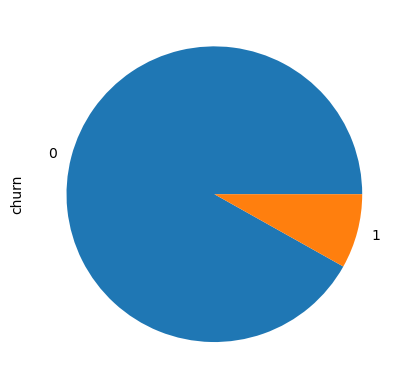

In [97]:
# Finding out churn/non churn percentage
print((churn_filtered['churn'].value_counts()/len(churn))*100)
((churn_filtered['churn'].value_counts()/len(churn))*100).plot(kind="pie")
plt.show()

As we can see that the churn percentage is very less , we can assume that most of the cutomers do not churn.
This typically shows a class imbalance
Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _9) 
can be dropped from the dataset.

In [99]:
churn_phase_cols = [col for col in churn_filtered.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [100]:
# Dropping the selected churn phase columns
churn_filtered.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
churn_filtered.shape

(30001, 150)

In [101]:
churn_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

Before proceding to check the remaining missing value handling, 
let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [102]:
# creating a list of column names for each month
mon_6_cols = [col for col in churn_filtered.columns if '_6' in col]
mon_7_cols = [col for col in churn_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_filtered.columns if '_8' in col]

In [103]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = churn_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr


loc_og_t2o_mou  loc_og_t2o_mou    0.000000
                std_og_t2o_mou    0.000000
                loc_ic_t2o_mou    0.000000
                arpu_6            0.000000
                arpu_7            0.000000
                                    ...   
churn           aug_vbc_3g       -0.090694
                jul_vbc_3g       -0.055555
                jun_vbc_3g       -0.031014
                sep_vbc_3g       -0.043793
                churn             0.000000
Length: 19485, dtype: float64

In [104]:
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)
col_to_drop=['fb_user_6','fb_user_7','fb_user_8','total_rech_amt_8','isd_og_mou_8',
             'sachet_2g_8','isd_og_mou_8','total_ic_mou_6','total_ic_mou_8','total_ic_mou_7',               
               'std_og_t2t_mou_8','std_og_t2t_mou_7','total_og_mou_8','std_og_t2m_mou_8' ,'total_og_mou_7',
             'std_ic_mou_8','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
churn_filtered.drop(col_to_drop, axis=1, inplace=True)

In [105]:
churn_filtered.shape

(30001, 126)

## STEP 4:

1. DERIVING NEW VARIABLES to UNDERSTAND THE DATA
2. EDA

In [106]:
# Age on Network is another important variable which helps to find the customers who will churn or stay in same network
# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
churn_filtered['tenure'] = (churn_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn_filtered.drop('aon',axis=1, inplace=True)

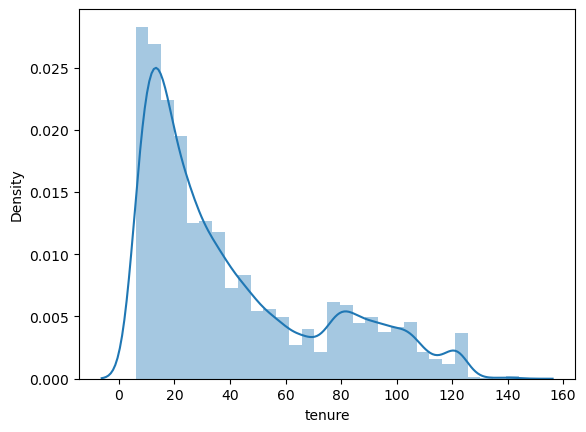

In [107]:
# Checking the distribution of he tenure variable

sns.distplot(churn_filtered['tenure'],bins=30)
plt.show()

In [108]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_filtered['tenure_range'] = pd.cut(churn_filtered['tenure'], tn_range, labels=tn_label)
churn_filtered['tenure_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

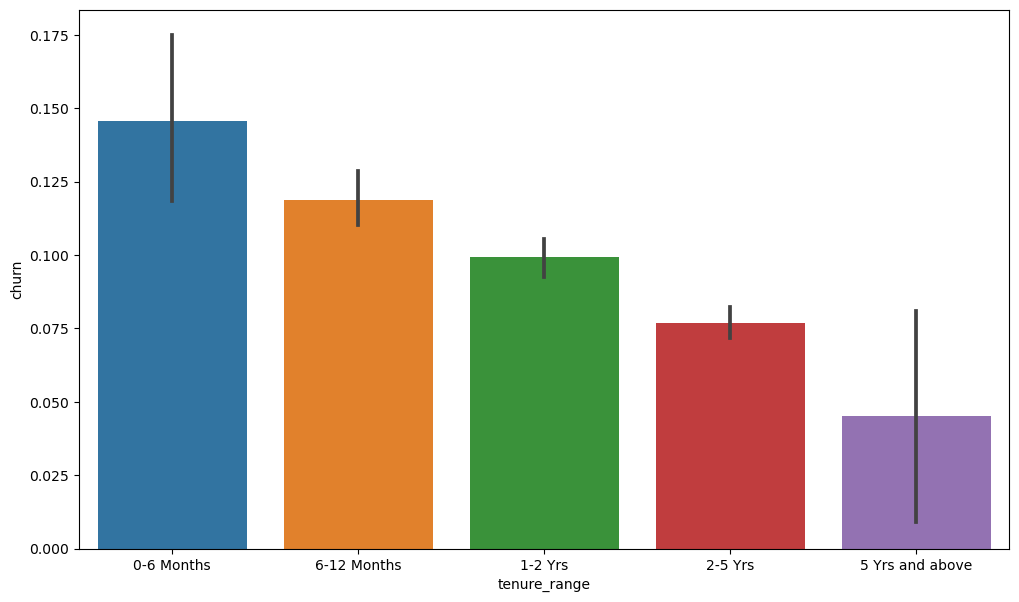

In [109]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=churn_filtered)
plt.show()

It is noticed that the maximum churns occur in 0-6 months period. 
Post which there is stability as the customer retains in the network.

The average revenue per user in good phase of customer is given by arpu_6 and arpu_7. 
since we have two seperate averages, lets take an average of these two and drop the other columns

In [110]:
churn_filtered["avg_arpu_6_7"]= (churn_filtered['arpu_6']+churn_filtered['arpu_7'])/2
churn_filtered['avg_arpu_6_7'].head()

0     206.1005
1    1209.5150
2     435.4720
3     556.1030
4     134.1235
Name: avg_arpu_6_7, dtype: float64

In [111]:
churn_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)
# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(30001, 126)

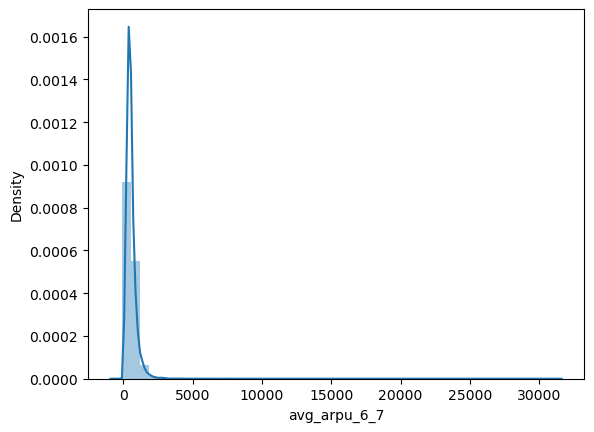

In [112]:
# Visualizing the column created
sns.distplot(churn_filtered['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

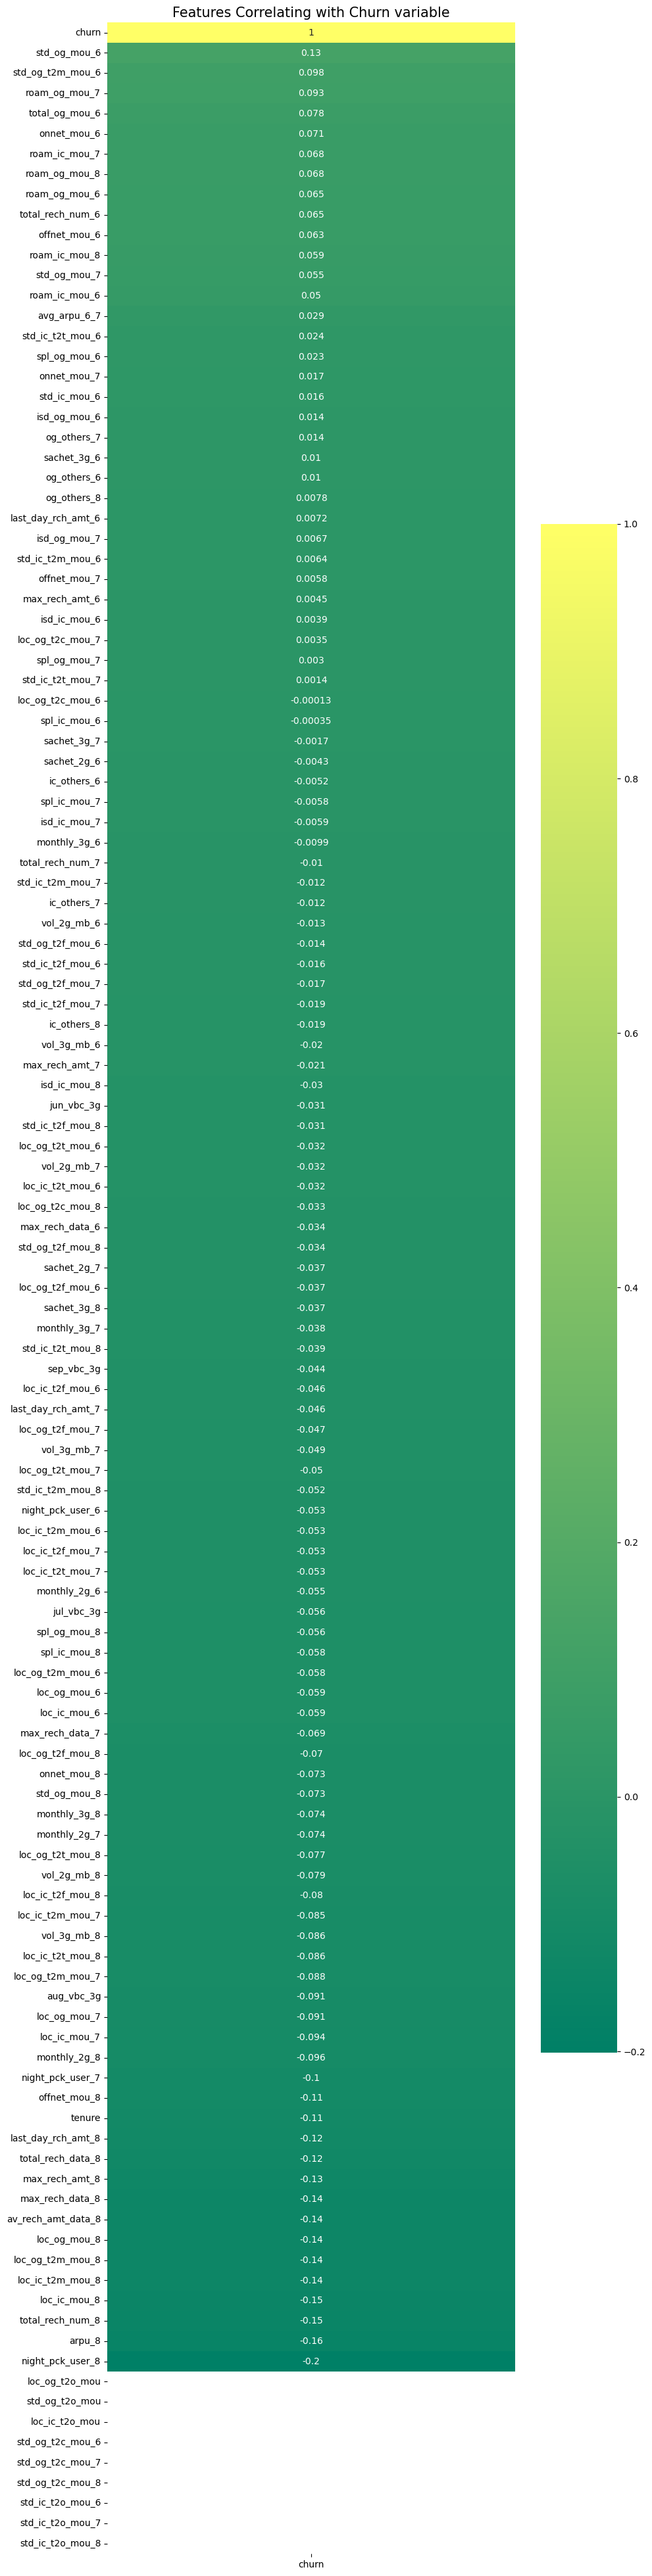

In [113]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(churn_filtered.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

Standard outgoing calls and Outgoing Roaming calls for 6 & 7th month is positively correlated with churn while
Night package user, average revenue per user, Total Number of recharges done in 8th month is negatively corelated with churn

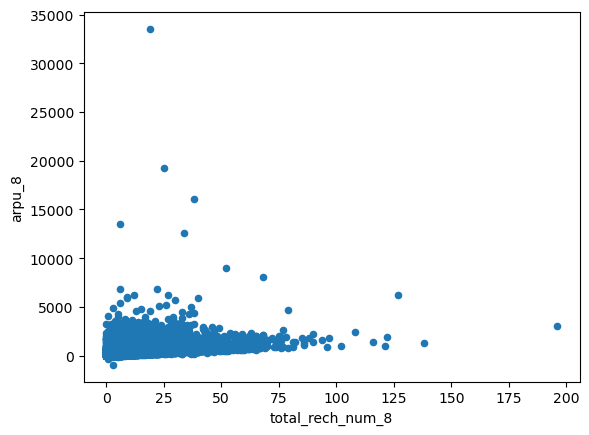

In [114]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

In [115]:
# Creating categories for month 8 column totalrecharge and their count
churn_filtered['total_rech_data_group_8']=pd.cut(churn_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_filtered['total_rech_num_group_8']=pd.cut(churn_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])



					Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


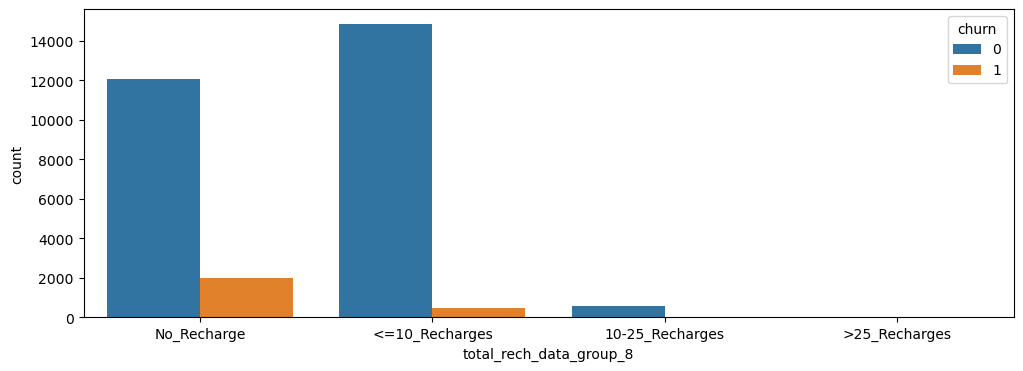

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges     8245
>25_Recharges       1824
No_Recharge          583
Name: total_rech_num_group_8, dtype: int64


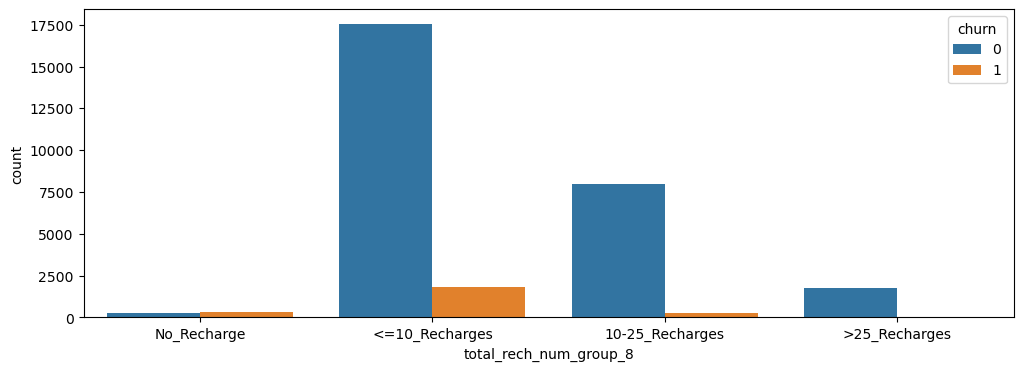

In [116]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",churn_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",churn_filtered['total_rech_num_group_8'].value_counts())
plt.show()

It is evident that churn rate is high when there is no recharge or when the number of recharges are less than 10
Churn rate is inversely proportional to number of recharges


In [117]:
churn_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

We can drop all "mou related" columns except onnet and offnet variable

In [118]:
churn_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [119]:
churn_filtered.shape

(30001, 47)

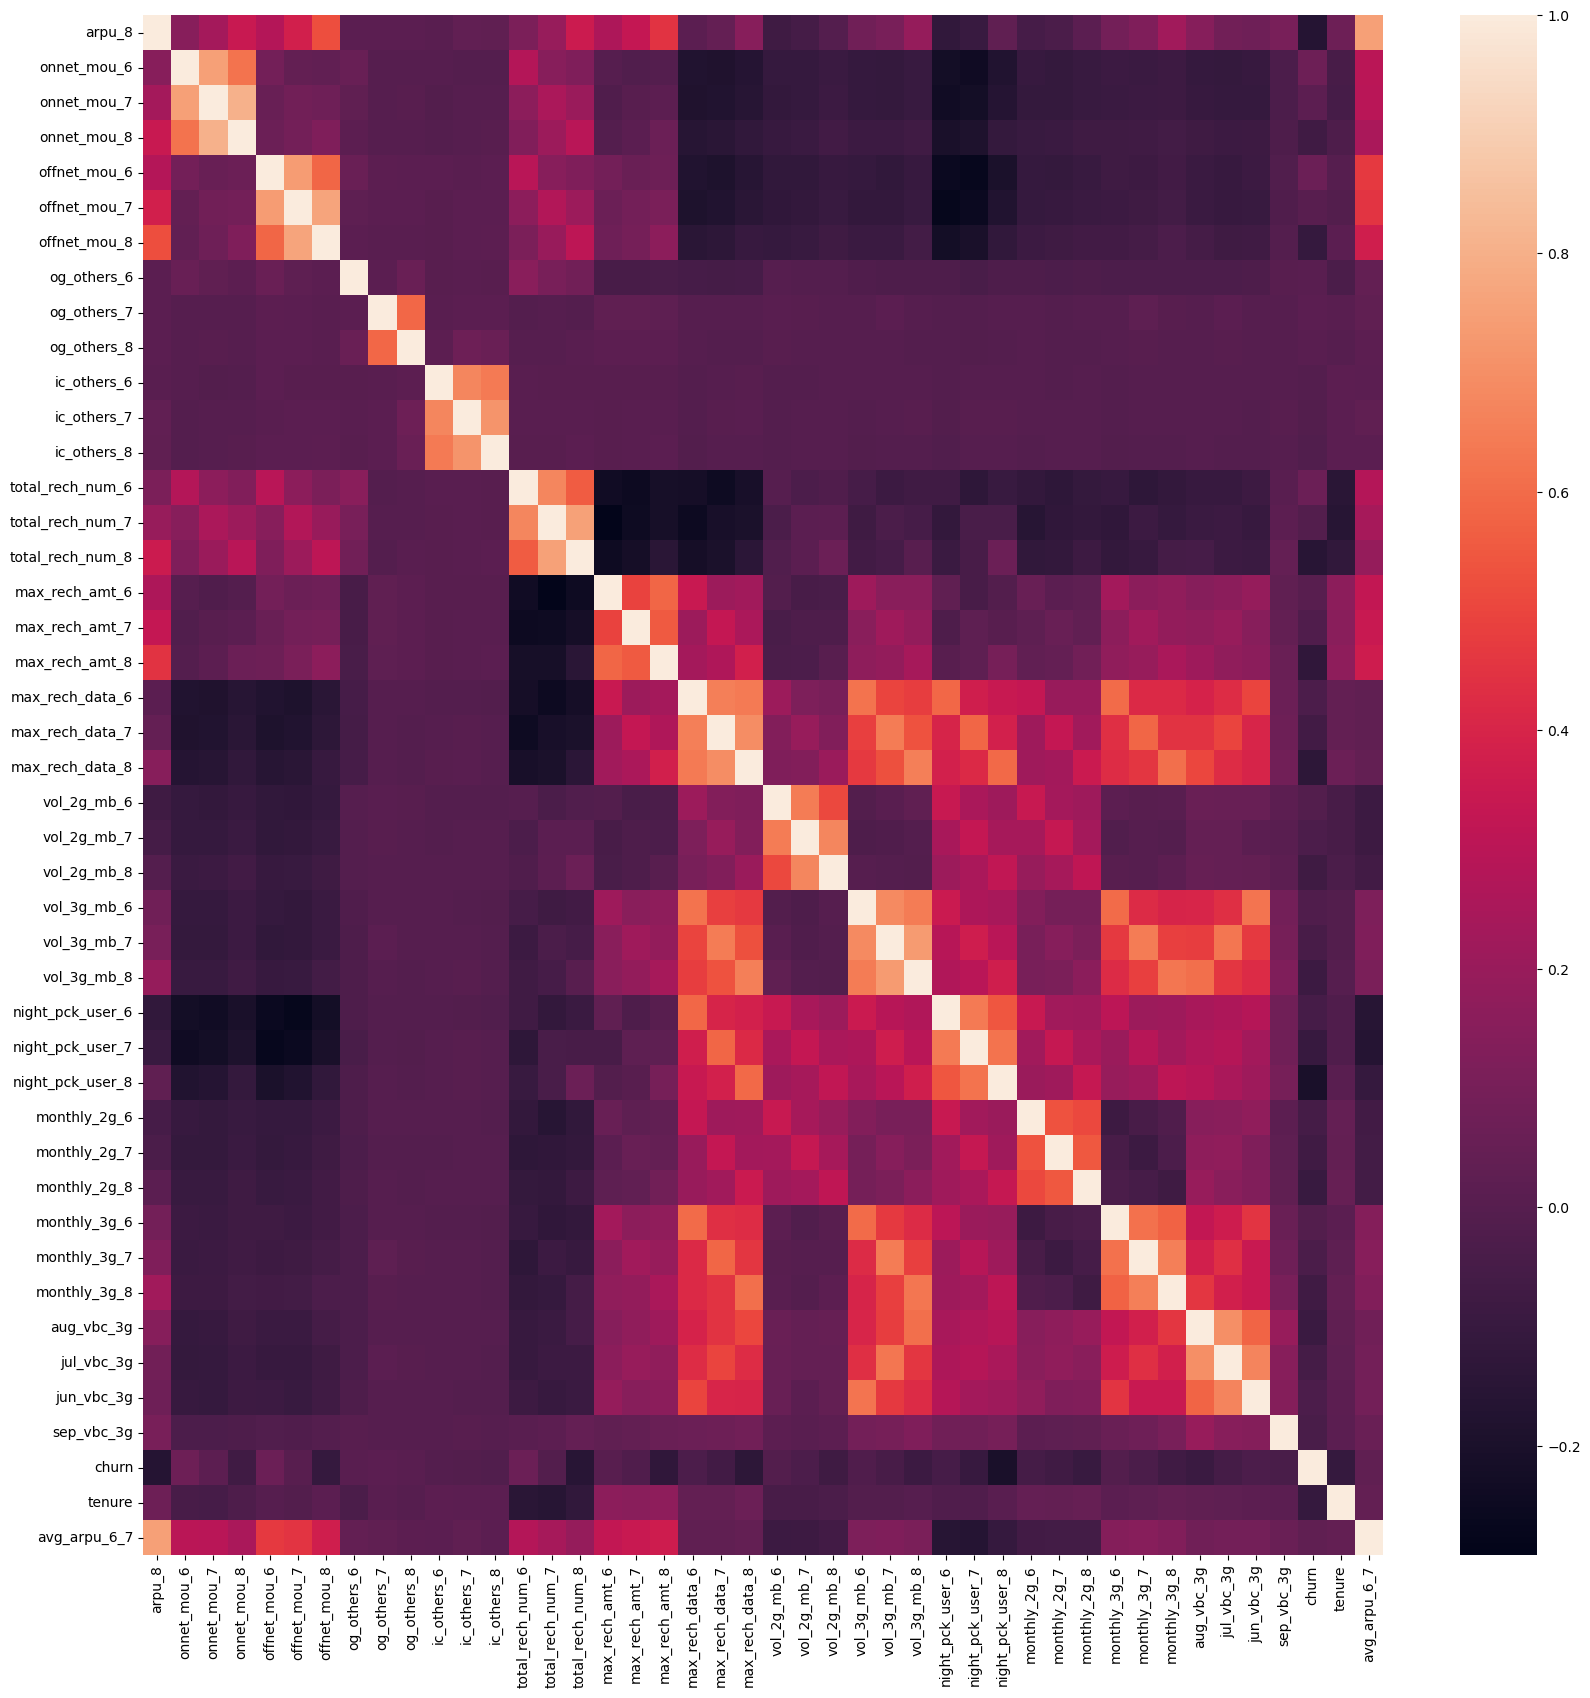

In [241]:
plt.figure(figsize = (20,20))
sns.heatmap(churn_filtered.corr())
plt.show()

In [121]:
churn_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)


In [122]:
churn_filtered.shape

(30001, 45)

In [123]:
churn_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [124]:
churn_rate = (sum(churn_filtered["churn"])/len(churn_filtered["churn"].index))*100
churn_rate

8.136395453484884

In [125]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            30001 non-null  float64
 1   onnet_mou_6       30001 non-null  float64
 2   onnet_mou_7       30001 non-null  float64
 3   onnet_mou_8       30001 non-null  float64
 4   offnet_mou_6      30001 non-null  float64
 5   offnet_mou_7      30001 non-null  float64
 6   offnet_mou_8      30001 non-null  float64
 7   og_others_6       30001 non-null  float64
 8   og_others_7       30001 non-null  float64
 9   og_others_8       30001 non-null  float64
 10  ic_others_6       30001 non-null  float64
 11  ic_others_7       30001 non-null  float64
 12  ic_others_8       30001 non-null  float64
 13  total_rech_num_6  30001 non-null  int64  
 14  total_rech_num_7  30001 non-null  int64  
 15  total_rech_num_8  30001 non-null  int64  
 16  max_rech_amt_6    30001 non-null  int64 

3. Split data into TEST and TRAIN Dataset

In [126]:
churn_filtered.shape

(30001, 44)

In [127]:
# divide data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [134]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(22500, 43)
(22500,)
(7501, 43)
(7501,)


4. Perform Scaling

In [130]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [131]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

As there are many variables we will start the process of dropping variables after doing the RFE

## STEP 5:

1. Handling Data Imbalance
Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [132]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [133]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (41338, 43)
Dimension of y_train_sm Shape: (41338,)


2. LOGISTIC REGRESSION

In [136]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41294
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 05 Nov 2023   Deviance:                       38351.
Time:                        19:07:12   Pearson chi2:                 5.59e+08
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1909      0.067     17.730      0.000       1.059       1.322
arpu_8             -21.3748      3.015     -7.089      0.000     -27.284     -15.466
onnet_mou_6          1.3007      0.348      3.743      0.000       0.620       1.982
onnet_mou_7          2.3250      0.483      4.817      0.000       1.379       3.271
onnet_mou_8         -5.8496      0.532    -11.000      0.000      -6.892      -4.807
offnet_mou_6         0.9268      0.345      2.686      0.007       0.250       1.603
offnet_mou_7         5.6821      0.622      9.136      0.000       4.463       6.901
offnet_mou_8       -27.1913      1.228    -22.137      0.000     -29.599     -24.784
og_others_6         -3.4394      0.514     -6.695      0.000      -4.446      -2.432
og_others_7         -2.9676      5.183     -0.573      0.567     -13.127       7.192
og_others_8      -1863.8168    865.382     -2.154      0.031   -3559.934    -167.700
ic_others_6        -15.9516      4.851     -3.288      0.001     -25.460      -6.443
ic_others_7          1.9219      2.608      0.737      0.461      -3.190       7.034
ic_others_8        -27.3391      4.769     -5.732      0.000     -36.686     -17.992
total_rech_num_6     5.0031      0.781      6.408      0.000       3.473       6.533
total_rech_num_7     4.1948      0.422      9.943      0.000       3.368       5.022
total_rech_num_8   -20.2576      0.746    -27.156      0.000     -21.720     -18.796
max_rech_amt_6       0.8949      0.425      2.104      0.035       0.061       1.729
max_rech_amt_7       2.0053      0.368      5.456      0.000       1.285       2.726
max_rech_amt_8      -4.7172      0.576     -8.191      0.000      -5.846      -3.588
max_rech_data_6      0.3423      0.381      0.897      0.370      -0.405       1.090
max_rech_data_7      2.6352      0.413      6.378      0.000       1.825       3.445
max_rech_data_8     -0.7441      0.515     -1.446      0.148      -1.753       0.264
vol_2g_mb_6          1.9037      0.657      2.898      0.004       0.616       3.191
vol_2g_mb_7          4.1075      0.595      6.899      0.000       2.940       5.274
vol_2g_mb_8        -13.8426      1.249    -11.084      0.000     -16.290     -11.395
vol_3g_mb_6          4.9272      1.497      3.292      0.001       1.994       7.860
vol_3g_mb_7          1.4755      1.110      1.329      0.184      -0.701       3.652
vol_3g_mb_8         -6.7477      1.365     -4.942      0.000      -9.424      -4.072
night_pck_user_6     0.2427      0.084      2.887      0.004       0.078       0.407
night_pck_user_7    -0.5403      0.089     -6.102      0.000      -0.714      -0.367
night_pck_user_8    -1.5041      0.085    -17.604      0.000      -1.672      -1.337
monthly_2g_6        -1.0121      0.188     -5.394      0.000      -1.380      -0.644
monthly_2g_7        -2.

LOGISTIC REGRESSION USING FEATURE SELECTION (RFE METHOD)

In [137]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [138]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True, False, False,  True, False,  True])

In [139]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'og_others_6', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8', 'vol_2g_mb_8',
       'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_8',
       'aug_vbc_3g', 'sep_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [140]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 8),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('og_others_6', True, 1),
 ('og_others_7', False, 19),
 ('og_others_8', False, 20),
 ('ic_others_6', False, 12),
 ('ic_others_7', False, 14),
 ('ic_others_8', True, 1),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_6', False, 11),
 ('max_rech_amt_7', False, 5),
 ('max_rech_amt_8', True, 1),
 ('max_rech_data_6', False, 15),
 ('max_rech_data_7', False, 10),
 ('max_rech_data_8', False, 18),
 ('vol_2g_mb_6', False, 13),
 ('vol_2g_mb_7', False, 3),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', False, 2),
 ('vol_3g_mb_7', False, 17),
 ('vol_3g_mb_8', False, 6),
 ('night_pck_user_6', False, 22),
 ('night_pck_user_7', False, 21),
 ('night_pck_user_8', False, 4),
 ('monthly_2g_6', False, 16),
 ('monthly_2g_7', True, 1),
 ('monthly_2g_8', True, 1)

3. ASSESSING THE MODELS WITH STATSMODELS PACKAGE

In [141]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41317
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20140.
Date:                Sun, 05 Nov 2023   Deviance:                       40279.
Time:                        19:12:15   Pearson chi2:                 1.38e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3376
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6607      0.059     11.135      0.000       0.544       0.777
arpu_8             -30.2547      2.837    -10.666      0.000     -35.814     -24.695
onnet_mou_6          0.8666      0.331      2.619      0.009       0.218       1.515
onnet_mou_7          1.9986      0.464      4.312      0.000       1.090       2.907
onnet_mou_8         -4.5567      0.515     -8.849      0.000      -5.566      -3.547
offnet_mou_7         5.9223      0.534     11.088      0.000       4.875       6.969
offnet_mou_8       -26.0690      1.200    -21.722      0.000     -28.421     -23.717
og_others_6         -2.8223      0.496     -5.691      0.000      -3.794      -1.850
ic_others_8        -30.8994      4.611     -6.701      0.000     -39.937     -21.861
total_rech_num_6     7.0009      0.688     10.169      0.000       5.652       8.350
total_rech_num_7     4.0281      0.373     10.785      0.000       3.296       4.760
total_rech_num_8   -23.5592      0.719    -32.772      0.000     -24.968     -22.150
max_rech_amt_8      -5.1385      0.506    -10.158      0.000      -6.130      -4.147
vol_2g_mb_8        -15.1002      1.075    -14.042      0.000     -17.208     -12.993
monthly_2g_7        -1.5811      0.201     -7.861      0.000      -1.975      -1.187
monthly_2g_8        -5.9794      0.323    -18.485      0.000      -6.613      -5.345
monthly_3g_6         2.6790      0.403      6.640      0.000       1.888       3.470
monthly_3g_8        -7.7425      0.668    -11.596      0.000      -9.051      -6.434
aug_vbc_3g         -11.2160      0.876    -12.805      0.000     -12.933      -9.499
sep_vbc_3g         -53.1497      4.147    -12.817      0.000     -61.277     -45.022
avg_arpu_6_7        37.2017      2.318     16.047      0.000      32.658      41.746
====================================================================================
"""

In [142]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([7.01362043e-03, 2.17792738e-01, 8.36945529e-01, 1.79447456e-01,
       1.79098640e-06, 2.92299523e-01, 8.11385460e-02, 6.75277336e-06,
       5.86271063e-01, 1.84647613e-01])

In [143]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.007014
1,0,0.217793
2,1,0.836946
3,0,0.179447
4,0,0.000002


Creating new column 'churn_pred' with 1 if Churn_Prob > 0.8 else 0

In [144]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.007014,0
1,0,0.217793,0
2,1,0.836946,1
3,0,0.179447,0
4,0,0.000002,0


In [145]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15846  4823]
 [ 3950 16719]]


In [ ]:
FROM THE CONFUSION MATRIX WE CAN DERIVE THAT THE TOTAL CHURN IS 3950+16719 AND 
NOT CHURN IS 15846+4823

In [146]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.7877739610044028


In [ ]:
VIF VALUES

In [147]:
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,38.86
19,avg_arpu_6_7,37.60
9,total_rech_num_7,7.43
8,total_rech_num_6,5.70
2,onnet_mou_7,5.38
10,total_rech_num_8,5.31
4,offnet_mou_7,4.24
5,offnet_mou_8,3.97
1,onnet_mou_6,3.68
3,onnet_mou_8,3.45


In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8088925443901495
Specificity =  0.766655377618656
False Positive Rate =  0.23334462238134404
Precision =  0.7761117816358741
True Negative Prediction Rate =  0.8004647403515862


Plotting the ROC Curve

In [151]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [152]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )



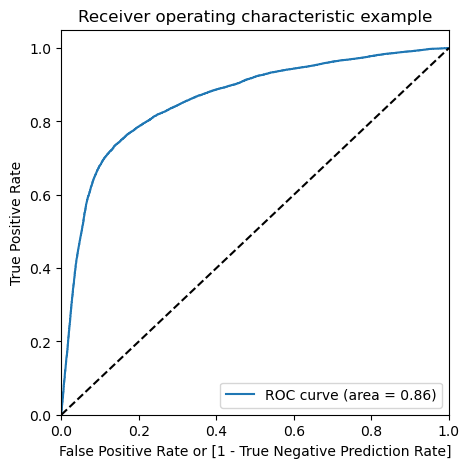

In [153]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)


Finding Optimal Cutoff Point

In [154]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007014,0,1,0,0,0,0,0,0,0,0,0
1,0,0.217793,0,1,1,1,0,0,0,0,0,0,0
2,1,0.836946,1,1,1,1,1,1,1,1,1,1,0
3,0,0.179447,0,1,1,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,0,0,0


In [155]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.605133     0.971406     0.238860
0.2          0.2  0.668078     0.945571     0.390585
0.3          0.3  0.718806     0.913348     0.524263
0.4          0.4  0.759156     0.868595     0.649717
0.5          0.5  0.787774     0.808893     0.766655
0.6          0.6  0.797741     0.731627     0.863854
0.7          0.7  0.769752     0.614447     0.925057
0.8          0.8  0.674416     0.383231     0.965601
0.9          0.9  0.558348     0.127389     0.989308


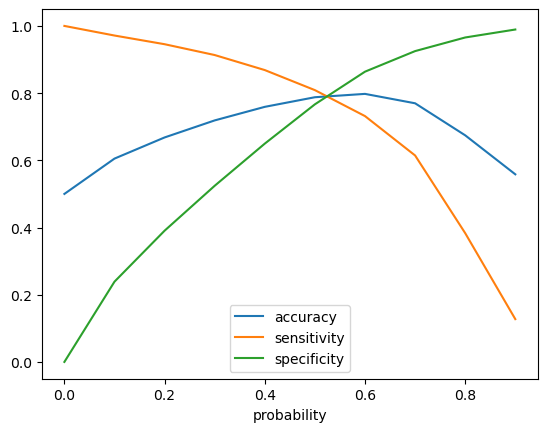

In [156]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optim point of classification as 0.5
From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.**


In [157]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.007014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.217793,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.836946,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
3,0,0.179447,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.787774     0.808893     0.766655
0.51         0.51  0.789153     0.801055     0.777251
0.52         0.52  0.791620     0.794185     0.789056
0.53         0.53  0.793144     0.786685     0.799603
0.54         0.54  0.794233     0.779864     0.808602
0.55         0.55  0.795467     0.772655     0.818279
0.56         0.56  0.796846     0.764914     0.828777
0.57         0.57  0.797039     0.756108     0.837970
0.58         0.58  0.797426     0.748174     0.846679
0.59         0.59  0.797595     0.739755     0.855436


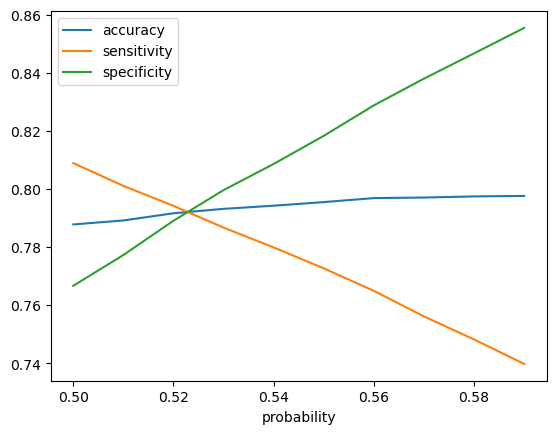

In [159]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.53

In [160]:
#### From the curve above,we can take 0.53 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.007014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.217793,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.836946,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
3,0,0.179447,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [161]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.7931443224152112


In [162]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16527  4142]
 [ 4409 16260]]


In [163]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.7866853742319415
Specificity =  0.7996032705984808
False Positive Rate =  0.20039672940151917
Precision =  0.7969806881678266
True Negative Prediction Rate =  0.7894058081773022


Precision and recall tradeoff

In [164]:
from sklearn.metrics import precision_recall_curve

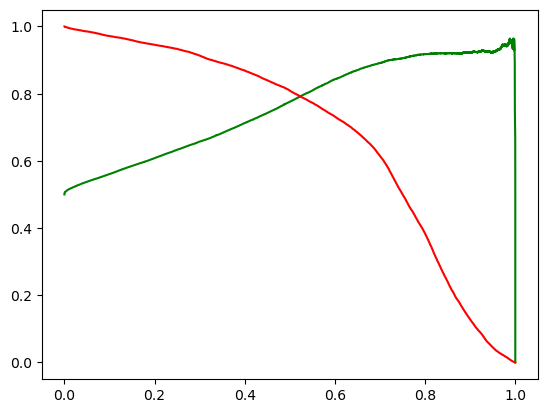

In [165]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### STEP 6 :
1. Model Evaluation

1.Making predictions on the test set
**Transforming and feature selection for test data**

In [166]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
16575,0.046455,0.000000,0.001074,0.000000,0.000000,0.011408,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.022801,0.072464,0.015306,0.062843,0.062843,0.056642,0.162058,0.162058,0.162058,0.001785,0.006578,0.002816,0.163451,0.159254,0.092118,0.5,0.5,0.5,0.0,0.0,0.0,0.428571,0.3750,0.1875,0.160223,0.217613,0.412013,0.000000,0.094203,0.049051
10086,0.044771,0.075774,0.067489,0.068323,0.009290,0.007710,0.005207,0.000000,0.0,0.0,0.000439,0.000201,0.0,0.013029,0.014493,0.015306,0.074813,0.087282,0.089908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.268116,0.035274
18646,0.042529,0.136566,0.114743,0.149345,0.001090,0.002716,0.001079,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.016287,0.036232,0.025510,0.124688,0.084539,0.112385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000181,0.000000,0.565217,0.034930
10925,0.027401,0.000000,0.000000,0.000367,0.001958,0.000000,0.000843,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.016287,0.028986,0.010204,0.062843,0.062843,0.000000,0.162058,0.162058,0.000000,0.003546,0.000170,0.000000,0.079117,0.037413,0.000000,0.5,0.5,0.0,0.0,0.0,0.0,0.214286,0.0625,0.0000,0.000000,0.000000,0.092829,0.000000,0.036232,0.033257
24503,0.044181,0.000548,0.013906,0.014724,0.113417,0.107065,0.052672,0.087789,0.0,0.0,0.001518,0.000000,0.0,0.052117,0.173913,0.091837,0.012469,0.012469,0.009890,0.000000,0.010932,0.000000,0.000000,0.000434,0.000000,0.000000,0.000000,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.069046,0.224638,0.041169


In [167]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,og_others_6,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_8,vol_2g_mb_8,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_8,aug_vbc_3g,sep_vbc_3g,avg_arpu_6_7
16575,0.046455,0.000000,0.001074,0.000000,0.011408,0.000000,0.000000,0.0,0.022801,0.072464,0.015306,0.056642,0.002816,0.0,0.0,0.428571,0.1875,0.160223,0.000000,0.049051
10086,0.044771,0.075774,0.067489,0.068323,0.007710,0.005207,0.000000,0.0,0.013029,0.014493,0.015306,0.089908,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.035274
18646,0.042529,0.136566,0.114743,0.149345,0.002716,0.001079,0.000000,0.0,0.016287,0.036232,0.025510,0.112385,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.034930
10925,0.027401,0.000000,0.000000,0.000367,0.000000,0.000843,0.000000,0.0,0.016287,0.028986,0.010204,0.000000,0.000000,0.0,0.0,0.214286,0.0000,0.000000,0.000000,0.033257
24503,0.044181,0.000548,0.013906,0.014724,0.107065,0.052672,0.087789,0.0,0.052117,0.173913,0.091837,0.009890,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.069046,0.041169


In [168]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

2. Predicting the target variable

In [169]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 16575    0.232613
10086    0.436469
18646    0.356630
10925    0.833367
24503    0.006767
10584    0.233125
2654     0.203539
23565    0.763606
5876     0.375729
19698    0.014449
dtype: float64


In [170]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
16575,0.232613
10086,0.436469
18646,0.356630
10925,0.833367
24503,0.006767


In [171]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [172]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
16575,0
10086,0
18646,0
10925,1
24503,0


In [173]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
16575,0,0.232613
10086,0,0.436469
18646,0,0.356630
10925,1,0.833367
24503,0,0.006767


In [174]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
16575,0,0.232613,0
10086,0,0.436469,0
18646,0,0.356630,0
10925,1,0.833367,1
24503,0,0.006767,0


In [175]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8073590187974937

Metrics Evaluation

In [176]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[5589 1302]
 [ 143  467]]


In [177]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [178]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7655737704918033
Specificity =  0.8110579016107967
False Positive Rate =  0.1889420983892033
Precision =  0.2639909553420011
True Negative Prediction Rate =  0.9750523377529658


3. Explaining the results

In [180]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  81.0 %
The sensitivity of the predicted model is:  77.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



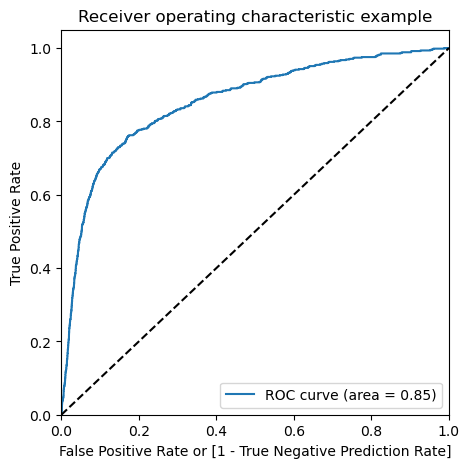

In [181]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

The AUC score for train dataset is 0.86 and the test dataset is 0.85.
This model can be considered as a good model.**
PCA

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [183]:
from sklearn.decomposition import PCA

In [184]:
pca = PCA(random_state=42)

In [185]:
pca.fit(X_train)

PCA(random_state=42)

In [186]:
pca.components_

array([[ 4.72029868e-02, -4.45900199e-02, -4.79398086e-02, ...,
         4.16107647e-03, -7.53971540e-05,  3.72096962e-02],
       [ 4.27156764e-01,  2.21480421e-01,  2.66437208e-01, ...,
         8.53620813e-04,  3.93561136e-04,  3.83160431e-01],
       [-2.27887707e-02,  4.67351056e-01,  5.28643300e-01, ...,
        -1.27539962e-03, -2.07145436e-03, -1.02944884e-02],
       ...,
       [ 4.92366118e-05,  6.25557356e-06, -2.83262151e-05, ...,
         2.53678280e-05, -5.88214198e-05, -4.00524309e-05],
       [ 2.39407849e-05, -1.32882224e-05,  2.51975263e-05, ...,
         5.18661703e-05,  5.21737690e-05, -1.90627697e-05],
       [ 1.73138863e-04,  2.46108654e-05,  1.81183885e-05, ...,
         1.22685675e-04, -2.12714129e-06, -1.67597411e-04]])

4. Analysing the explained variance ratio

In [187]:
pca.explained_variance_ratio_

array([4.23284569e-01, 1.50632979e-01, 9.41700737e-02, 6.20924527e-02,
       4.71778948e-02, 4.63575788e-02, 3.78120960e-02, 3.46933754e-02,
       2.25847992e-02, 1.36159065e-02, 1.02111554e-02, 9.45038613e-03,
       8.78227341e-03, 8.54760162e-03, 6.60256580e-03, 6.34517515e-03,
       5.59532232e-03, 3.26230811e-03, 2.85303020e-03, 2.09133734e-03,
       2.00508981e-03, 5.72578060e-04, 4.94444115e-04, 4.13760909e-04,
       1.79900641e-04, 1.05547629e-04, 2.40013181e-05, 1.50661247e-05,
       1.14591417e-05, 4.73060374e-06, 3.69307110e-06, 3.24496258e-06,
       2.61914288e-06, 7.06190381e-07, 9.65584348e-08, 5.59540455e-08,
       3.56265785e-08, 2.34316725e-08, 2.02799132e-08, 1.44779997e-08,
       1.19033188e-08, 1.03056558e-08, 9.71512076e-09])

In [188]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

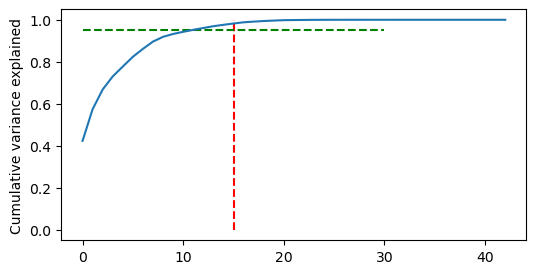

In [191]:
fig = plt.figure(figsize=[6,3])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

we can use IncrementalPCA for the best result

In [192]:
from sklearn.decomposition import IncrementalPCA

In [193]:
pca_final = IncrementalPCA(n_components=16)

In [194]:
df_train_pca = pca_final.fit_transform(X_train)

In [195]:
df_train_pca.shape

(24000, 16)

In [196]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [197]:
corrmat.shape

(16, 16)

In [198]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6001, 16)

Applying logistic regression on the Principal components

In [201]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()

In [202]:
model_pca = learner_pca.fit(df_train_pca, y_train)

5. Making predictions on the test set

In [203]:
pred_probs_test = model_pca.predict_proba(df_test_pca)


In [204]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

6. Confusion matrix, Sensitivity and Specificity

In [205]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [206]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[5507   27]
 [ 418   49]]


In [207]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [208]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9258456923846026
Sensitivity:- 0.10492505353319058
Specificity:- 0.9951210697506324


7. Making predictions on the train set

In [211]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [213]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.83'

8. Confusion matrix, Sensitivity and Specificity

In [214]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [215]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[21876   150]
 [ 1799   175]]


In [216]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [217]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9187916666666667
Sensitivity:- 0.08865248226950355
Specificity:- 0.9931898665213839


2. Decision Tree with PCA

In [218]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
dt = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

In [219]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [220]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [221]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [222]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.318240,0.048140,0.005379,0.000934,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
1,0.388881,0.052394,0.009350,0.005028,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
2,0.455362,0.021240,0.011707,0.012041,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
3,0.332156,0.060234,0.006881,0.003332,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
4,0.322692,0.020764,0.004660,0.001581,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3


In [223]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
39,0.736710,0.038264,0.004885,0.000745,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.917667,0.918000,0.919333,0.917167,0.918042,0.000803,1
41,0.740269,0.061755,0.003873,0.001137,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.917667,0.918000,0.919333,0.917167,0.918042,0.000803,1
0,0.318240,0.048140,0.005379,0.000934,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3
1,0.388881,0.052394,0.009350,0.005028,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3
2,0.455362,0.021240,0.011707,0.012041,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3


In [224]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [226]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [227]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [228]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [229]:
evaluate_model(dt_best)

Train Accuracy : 0.9315833333333333
Train Confusion Matrix:
[[21734   292]
 [ 1350   624]]
--------------------------------------------------
Test Accuracy : 0.9220129978336944
Test Confusion Matrix:
[[5430  104]
 [ 364  103]]


Random Forest with PCA

In [230]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)
rf.fit(df_train_pca, y_train)
rf.oob_score_

0.91825

Hyper-parameter tuning for the Random Forest

In [232]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [233]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [234]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [235]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [236]:
grid_search.best_score_

0.9177499999999998

In [237]:
grid_search.best_params_

{'max_depth': 2,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [238]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [239]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [240]:
evaluate_model(rfc_model)

Train Accuracy : 0.9177916666666667
Train Confusion Matrix:
[[22026     0]
 [ 1973     1]]
--------------------------------------------------
Test Accuracy : 0.9221796367272121
Test Confusion Matrix:
[[5534    0]
 [ 467    0]]


## Summary:

Note that the best parameters produced the accuracy of 91% which is not significantly deterred than the accuracy of original random forest, which is pegged around 92%

## Conclusion :

The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.

The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

## Details:

 After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

### Logistic Regression  :

Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

#### Logistic Regression

.  Train Accuracy : ~79%
. Test Accuracy : ~80%

#### Logistic regression with PCA

. Train Accuracy : ~91%
. Test Accuracy : ~92%

#### Decision Tree with PCA:

. Train Accuracy : ~93%
. Test Accuracy : ~92%


#### Random Forest with PCA:
. Train Accuracy :~ 91%
. Test Accuracy :~ 92%